___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Tree Types Prediction Project***". This is the second medium project of ***Machine Learning*** course.

In this project, you must perform EDA processes for implementing predictive models. Handling outliers, domain knowledge and feature engineering (using ***sqlite3*** library) will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind classification models and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering using SQLite local database. 

At this point, in order to improve your skills of using SQL with Python, you are asked to perform feature engineering operations using *sqlite3* library in Python.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** and ***K-Nearest Neighbors (KNN)*** algorithms. Also, evaluate the success of your models with appropriate performance metrics and visualize them using ***Yellowbrick, Seaborn*** or ***Matplotlib*** modules.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.

- ***NOTE:*** *Evaluate your models knowing that this is [imbalanced data](https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb). This is not the primary goal of the project, but you can study solve the class [imbalance problem](https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28) if you want.*



---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Visualize Zscore Tresholds (how many times IQR) by Continuous Variables*
    
    *ii. Drop Outliers*


#### 3. Feature Engineering with sqlite3 Module


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement KNN Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Implement SVM Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### *ii. Load Dataset*

In [2]:
df = pd.read_csv("covtype.csv")

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [3]:
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [4]:
df.shape

(581012, 55)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [6]:
df.Soil_Type1.value_counts(dropna=False)

0    577981
1      3031
Name: Soil_Type1, dtype: int64

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

<AxesSubplot:>

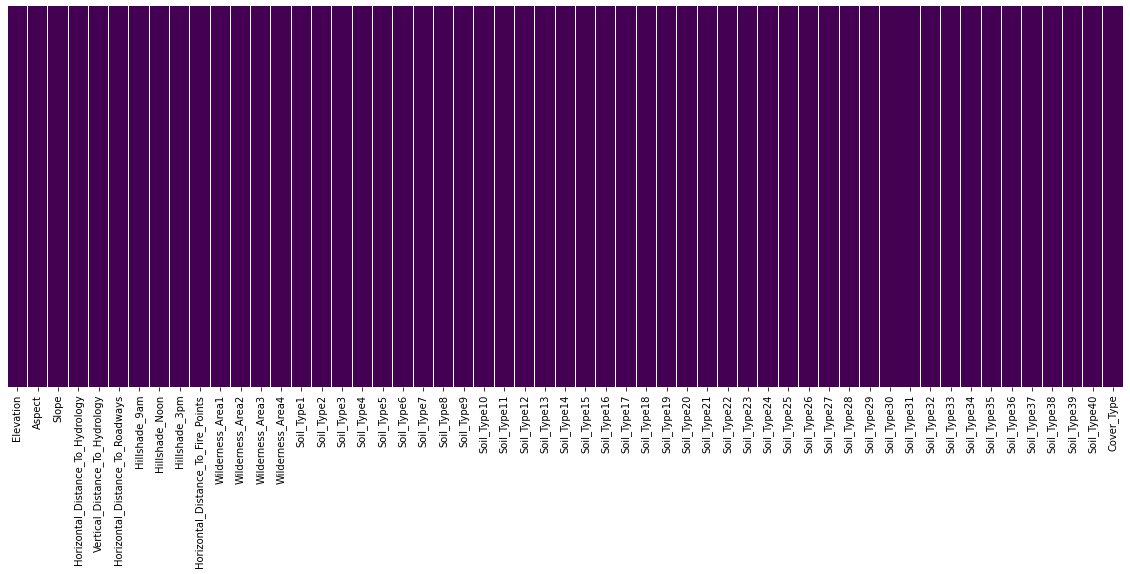

In [7]:
plt.figure(figsize=(20,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.

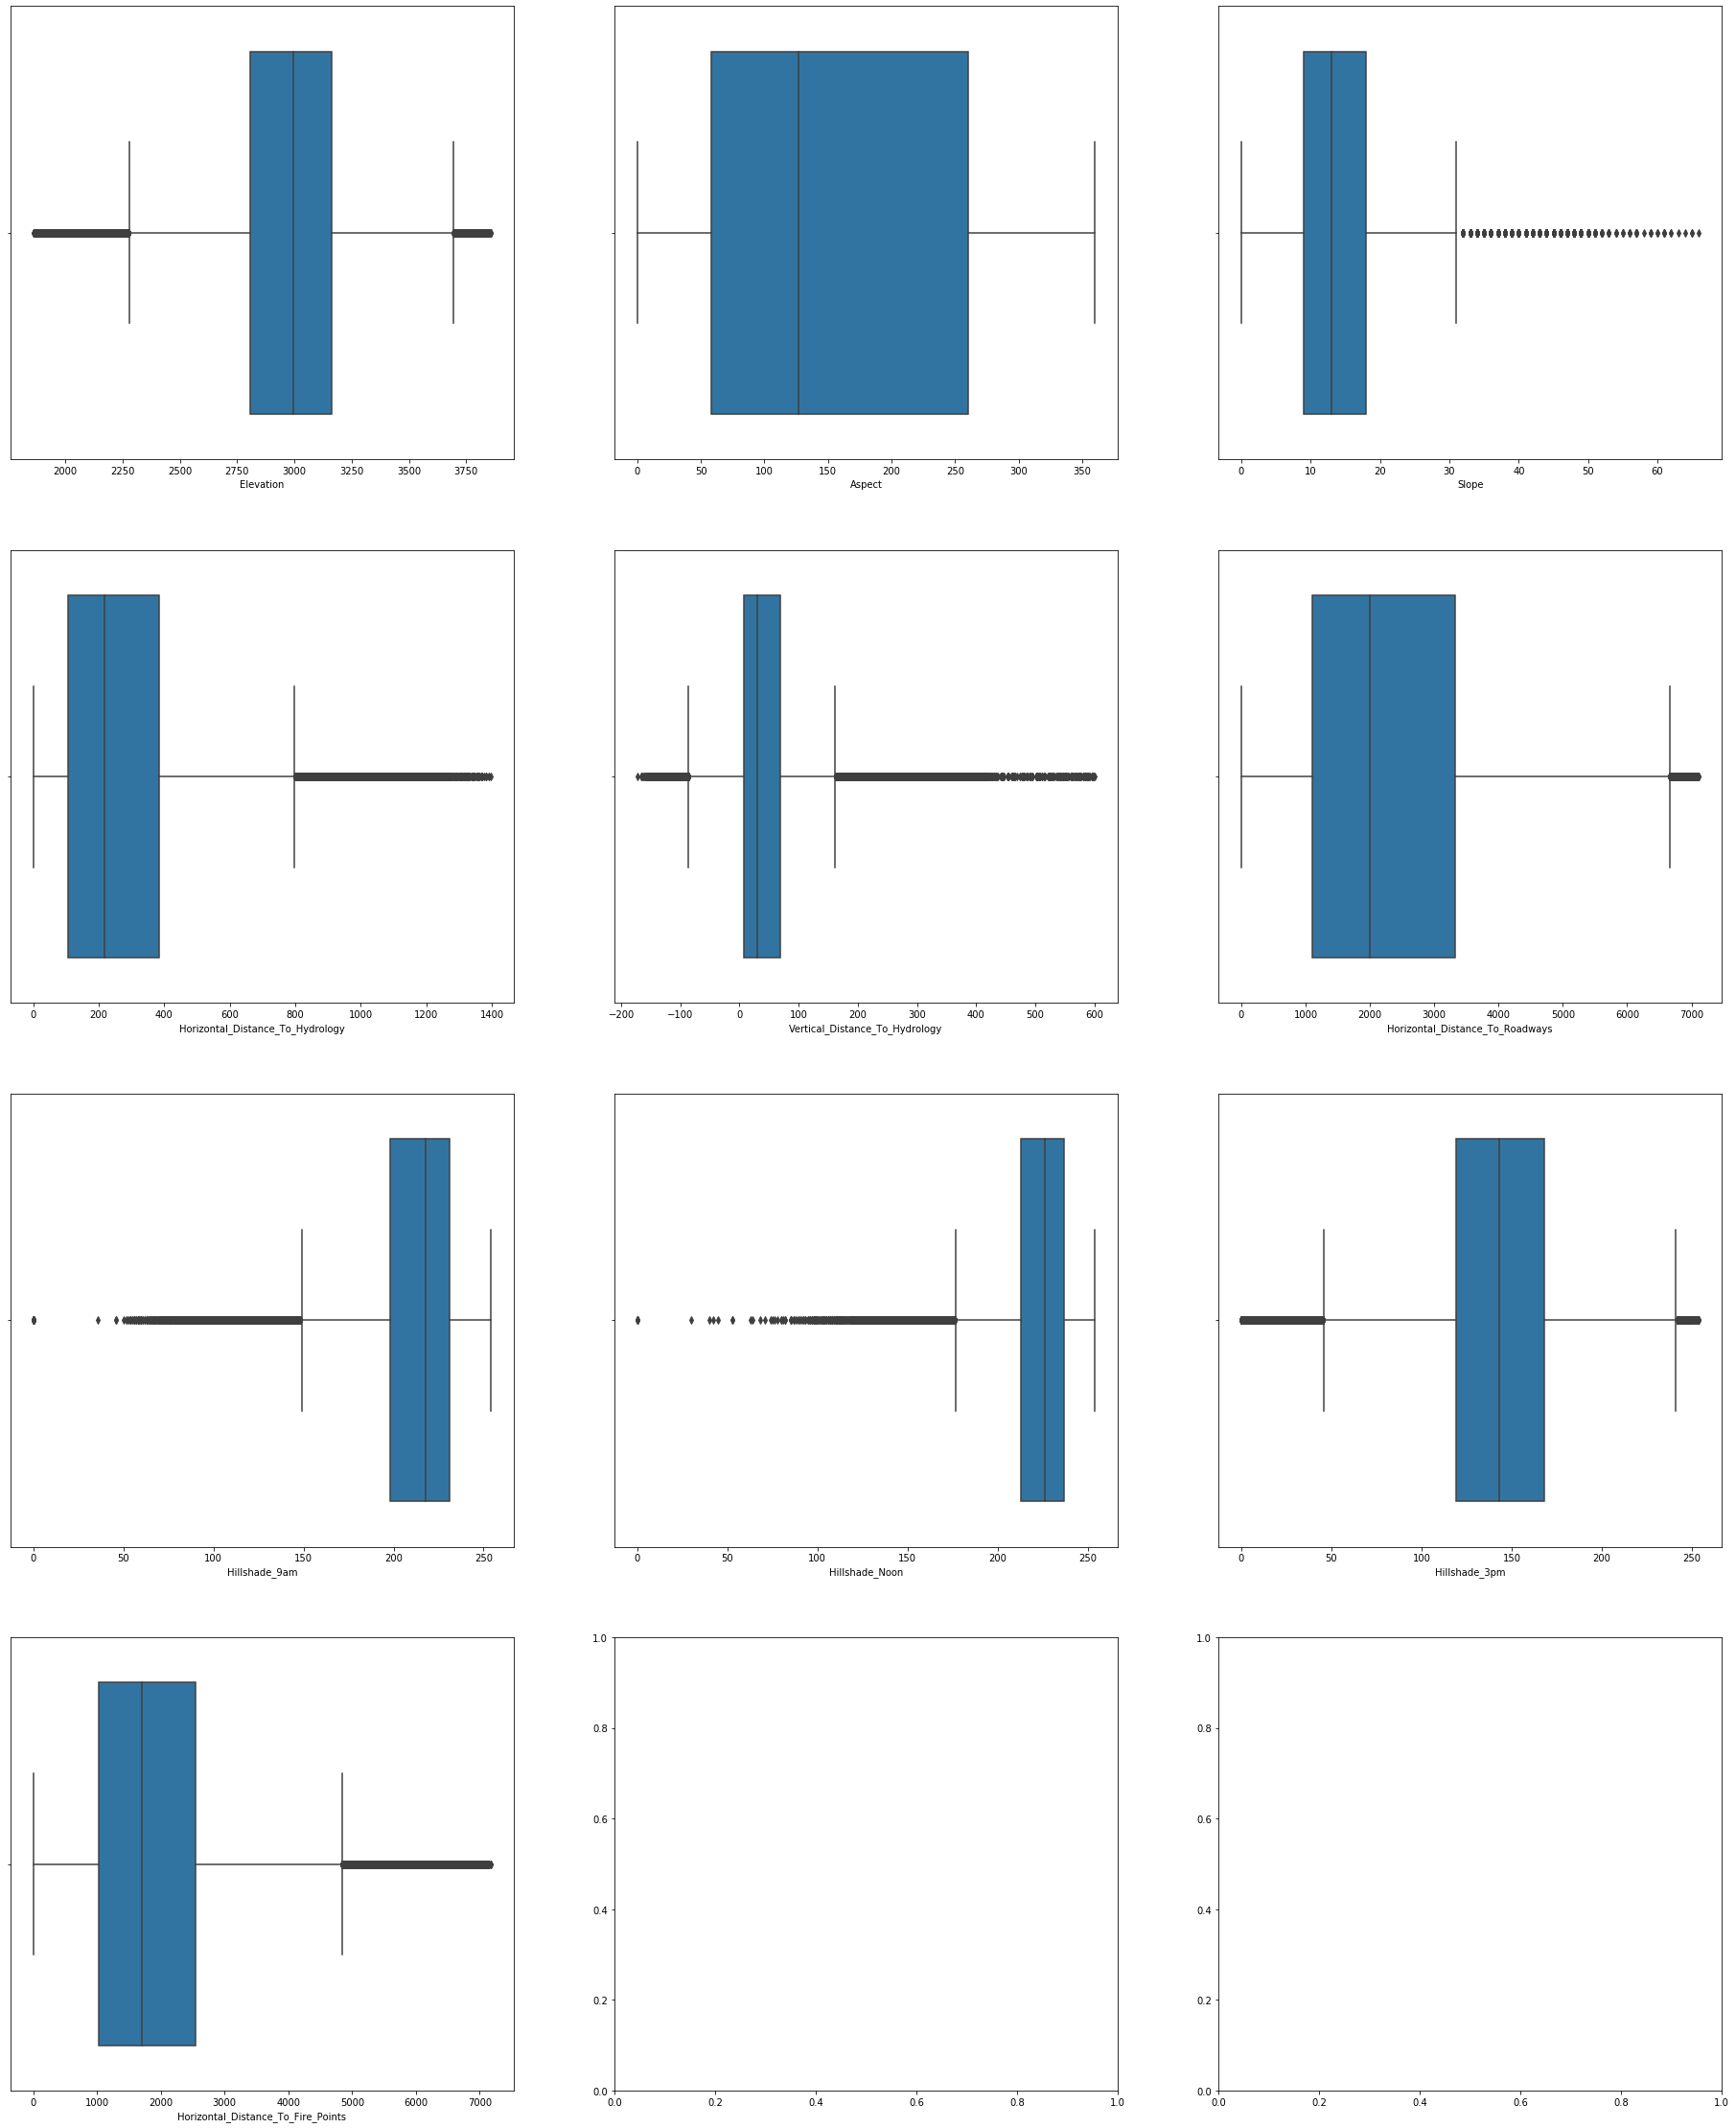

In [7]:
fig, axes = plt.subplots(nrows = 4,ncols = 3,figsize = (32,40))
i=0
y=0
for column in df.columns[:10]:
    sns.boxplot(column, data = df,ax=axes[i,y])
    if y != 2:
        y += 1
    else:
        i += 1
        y = 0

### Deal with Outliers

#### *i. Visualize Zscore Tresholds (how many times IQR) by Continuous Variables*

There are many different methods for outliers. You can use IQR values used as standard to deal with outliers, or you can define two functions to help you understand the outliers and how you can deal with them.
- Two functions given as extra for outlier detection in *EDA Project (Outo Scout)* are given below.

In [8]:
def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.1, print_list = False):
    z_scores = stats.zscore(df[col].dropna())
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
        df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), 
               colors="r", ls = ":"
              )
    plt.annotate("Zscore : {}\nValue : {}\nPercentile : {}".format(best_treshold, outlier_limit, 
                                                                   (np.round(percentile_threshold, 3), 
                                                                    np.round(100-percentile_threshold, 3))), 
                 (best_treshold, df_outlier.outlier_count.max()/2))
    #plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, outlier_limit, percentile_threshold)

In [9]:
def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step)
    plt.show()

In [10]:
from scipy import stats

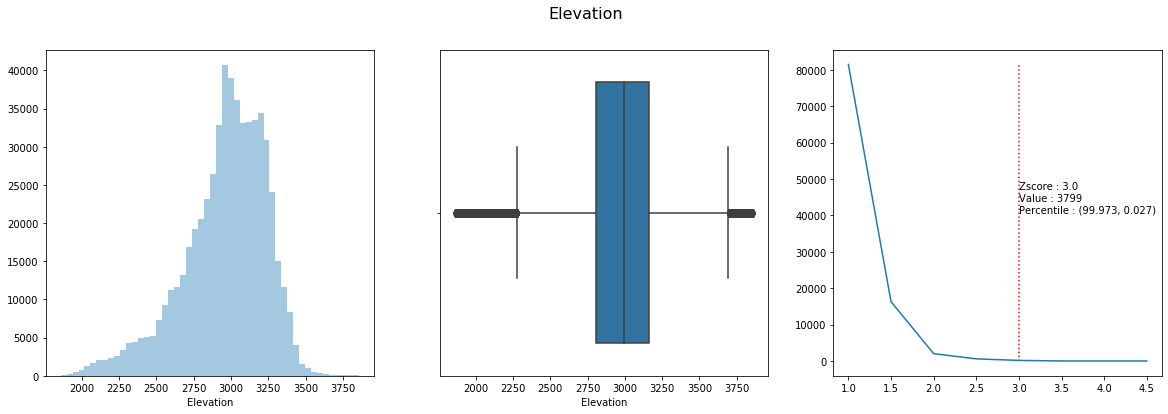

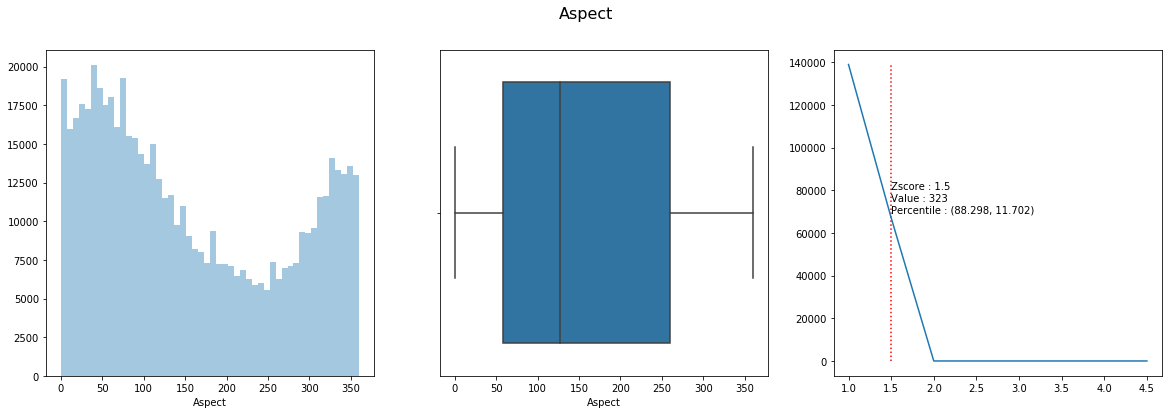

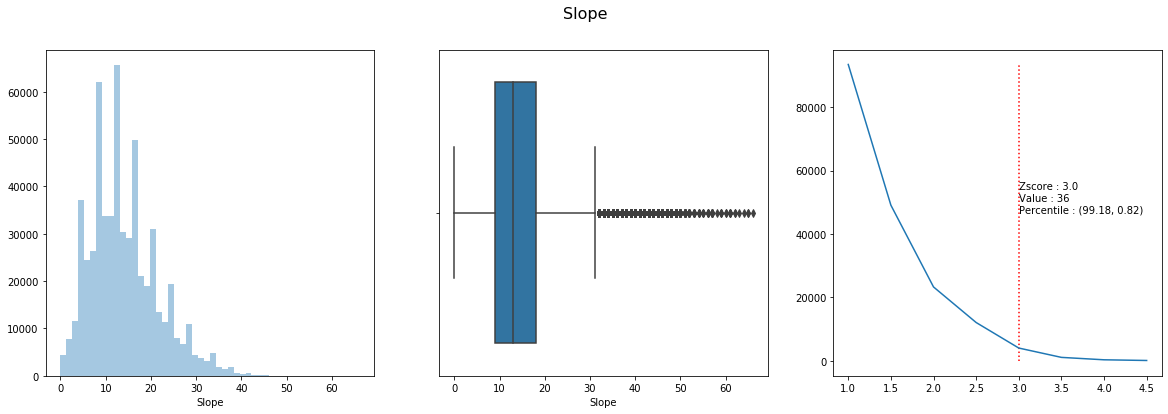

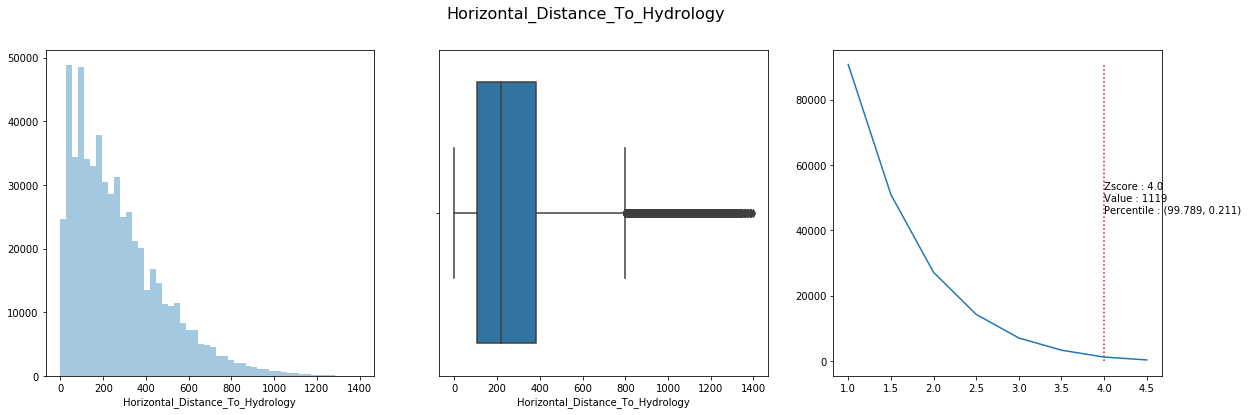

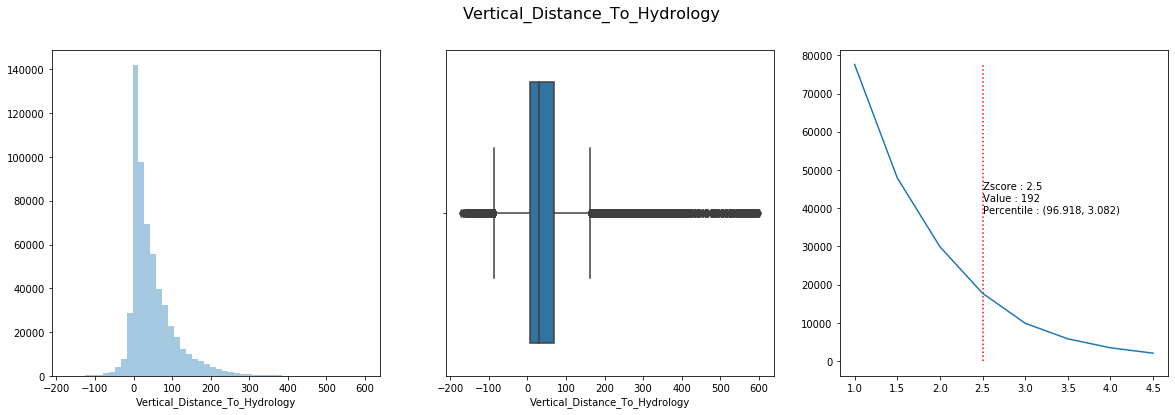

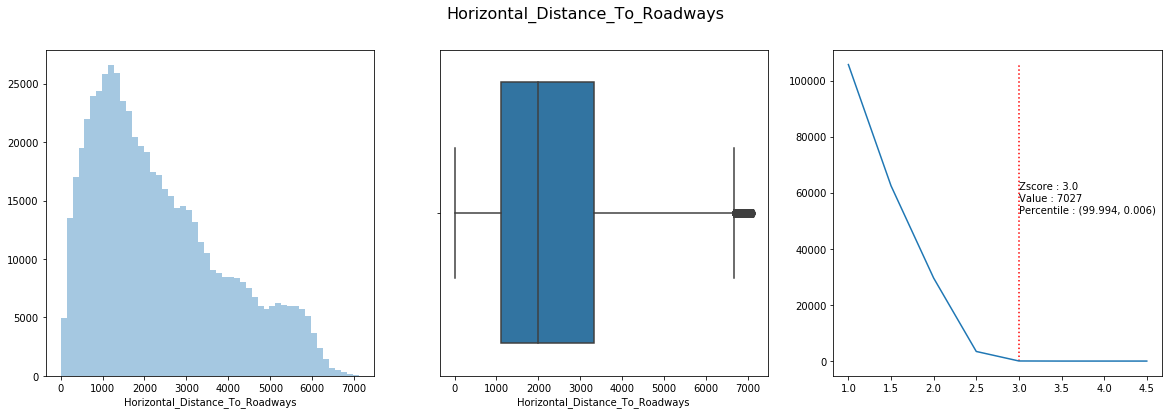

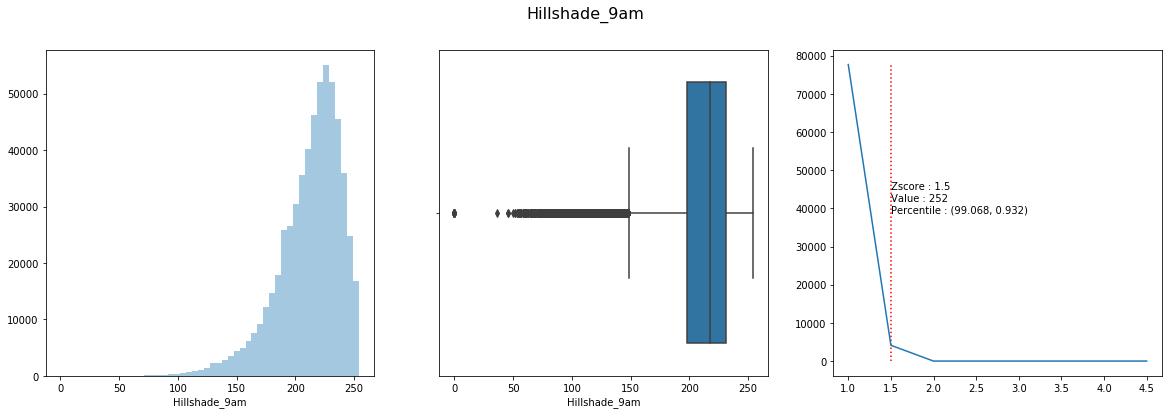

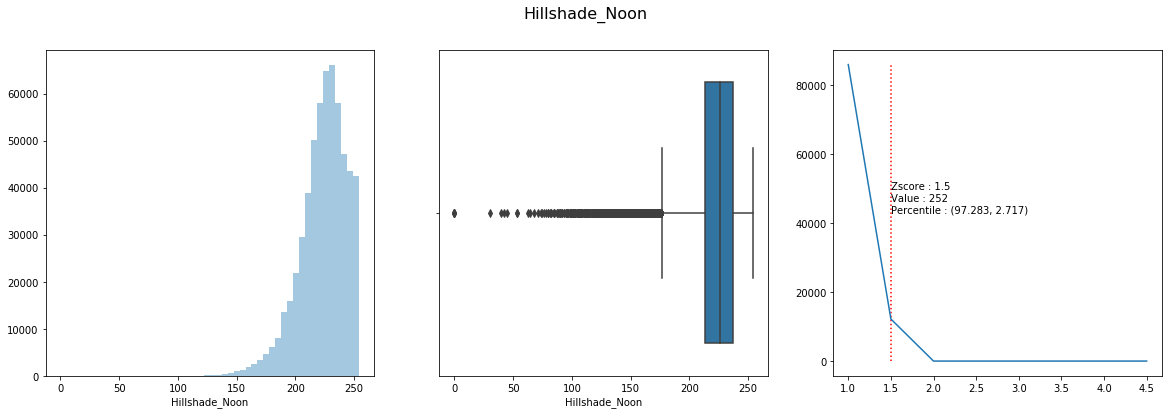

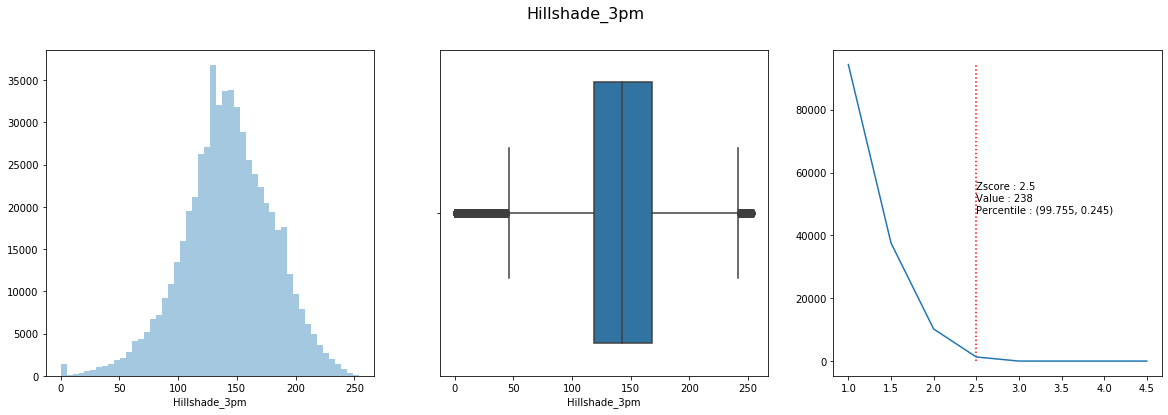

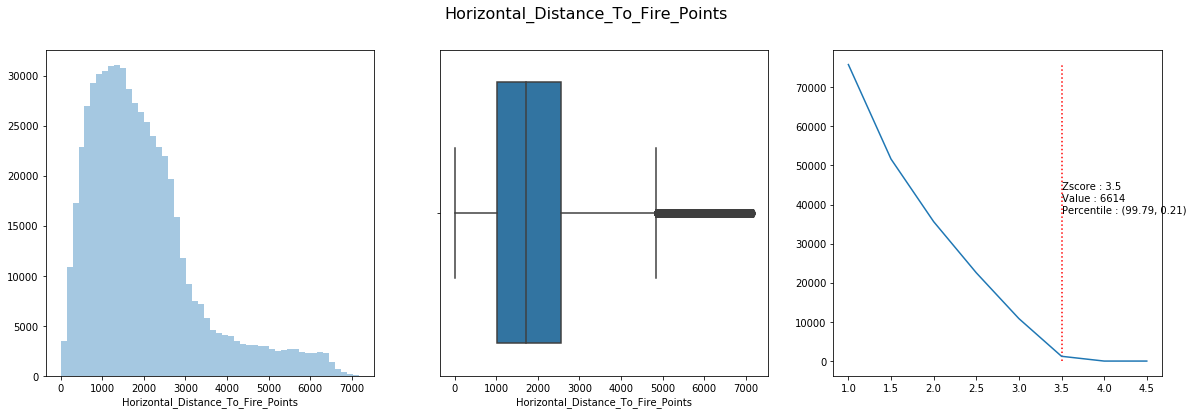

In [11]:
for column in df.columns[:10]:
    outlier_inspect(df,column)

In [12]:
z_scores = stats.zscore(df.Elevation)
print(z_scores)
abs_z_scores = np.abs(z_scores)
print(abs_z_scores)
df.loc[abs_z_scores > 3, "Elevation"] = df.Elevation.mean()

[-1.29780509 -1.31923485 -0.5549068  ... -2.04784663 -2.05498988
 -2.05856151]
[1.29780509 1.31923485 0.5549068  ... 2.04784663 2.05498988 2.05856151]


In [14]:
df.groupby("Cover_Type")["Aspect"].mean()

Cover_Type
1    156.138227
2    152.060515
3    176.372490
4    137.139425
5    139.283051
6    180.539068
7    153.236226
Name: Aspect, dtype: float64

In [15]:
z_scores = stats.zscore(df.Aspect)
abs_z_scores = np.abs(z_scores)

df.loc[abs_z_scores > 1.5, "Aspect"] = df.Aspect.mean()

In [16]:
z_scores = stats.zscore(df.Slope)
abs_z_scores = np.abs(z_scores)
df.loc[abs_z_scores > 3, "Slope"] = df.Slope.mean()


In [17]:
z_scores = stats.zscore(df.Horizontal_Distance_To_Hydrology)
abs_z_scores = np.abs(z_scores)
df.loc[abs_z_scores > 4, "Horizontal_Distance_To_Hydrology"] = df.Horizontal_Distance_To_Hydrology.mean()


In [18]:
z_scores = stats.zscore(df.Vertical_Distance_To_Hydrology)
abs_z_scores = np.abs(z_scores)
df.loc[abs_z_scores > 2.5, "Vertical_Distance_To_Hydrology"] = df.Vertical_Distance_To_Hydrology.mean()


In [19]:
z_scores = stats.zscore(df.Horizontal_Distance_To_Roadways)
abs_z_scores = np.abs(z_scores)
df.loc[abs_z_scores > 3, "Horizontal_Distance_To_Roadways"] = df.Horizontal_Distance_To_Roadways.mean()


In [20]:
z_scores = stats.zscore(df.Hillshade_9am)
abs_z_scores = np.abs(z_scores)
df.loc[abs_z_scores > 1.5, "Hillshade_9am"] = df.Hillshade_9am.mean()

In [21]:
z_scores = stats.zscore(df.Hillshade_Noon)
abs_z_scores = np.abs(z_scores)
df.loc[abs_z_scores > 1.5, "Hillshade_Noon"] = df.Hillshade_Noon.mean()

In [22]:
z_scores = stats.zscore(df["Hillshade_3pm"])
abs_z_scores = np.abs(z_scores)
df.loc[abs_z_scores > 2.5, "Hillshade_3pm"] = df.Hillshade_3pm.mean()



In [23]:
z_scores = stats.zscore(df.Horizontal_Distance_To_Fire_Points)
abs_z_scores = np.abs(z_scores)
df.loc[abs_z_scores > 3.5, "Horizontal_Distance_To_Fire_Points"] = df.Horizontal_Distance_To_Fire_Points.mean()


In [24]:
df.shape

(581012, 55)

In [25]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


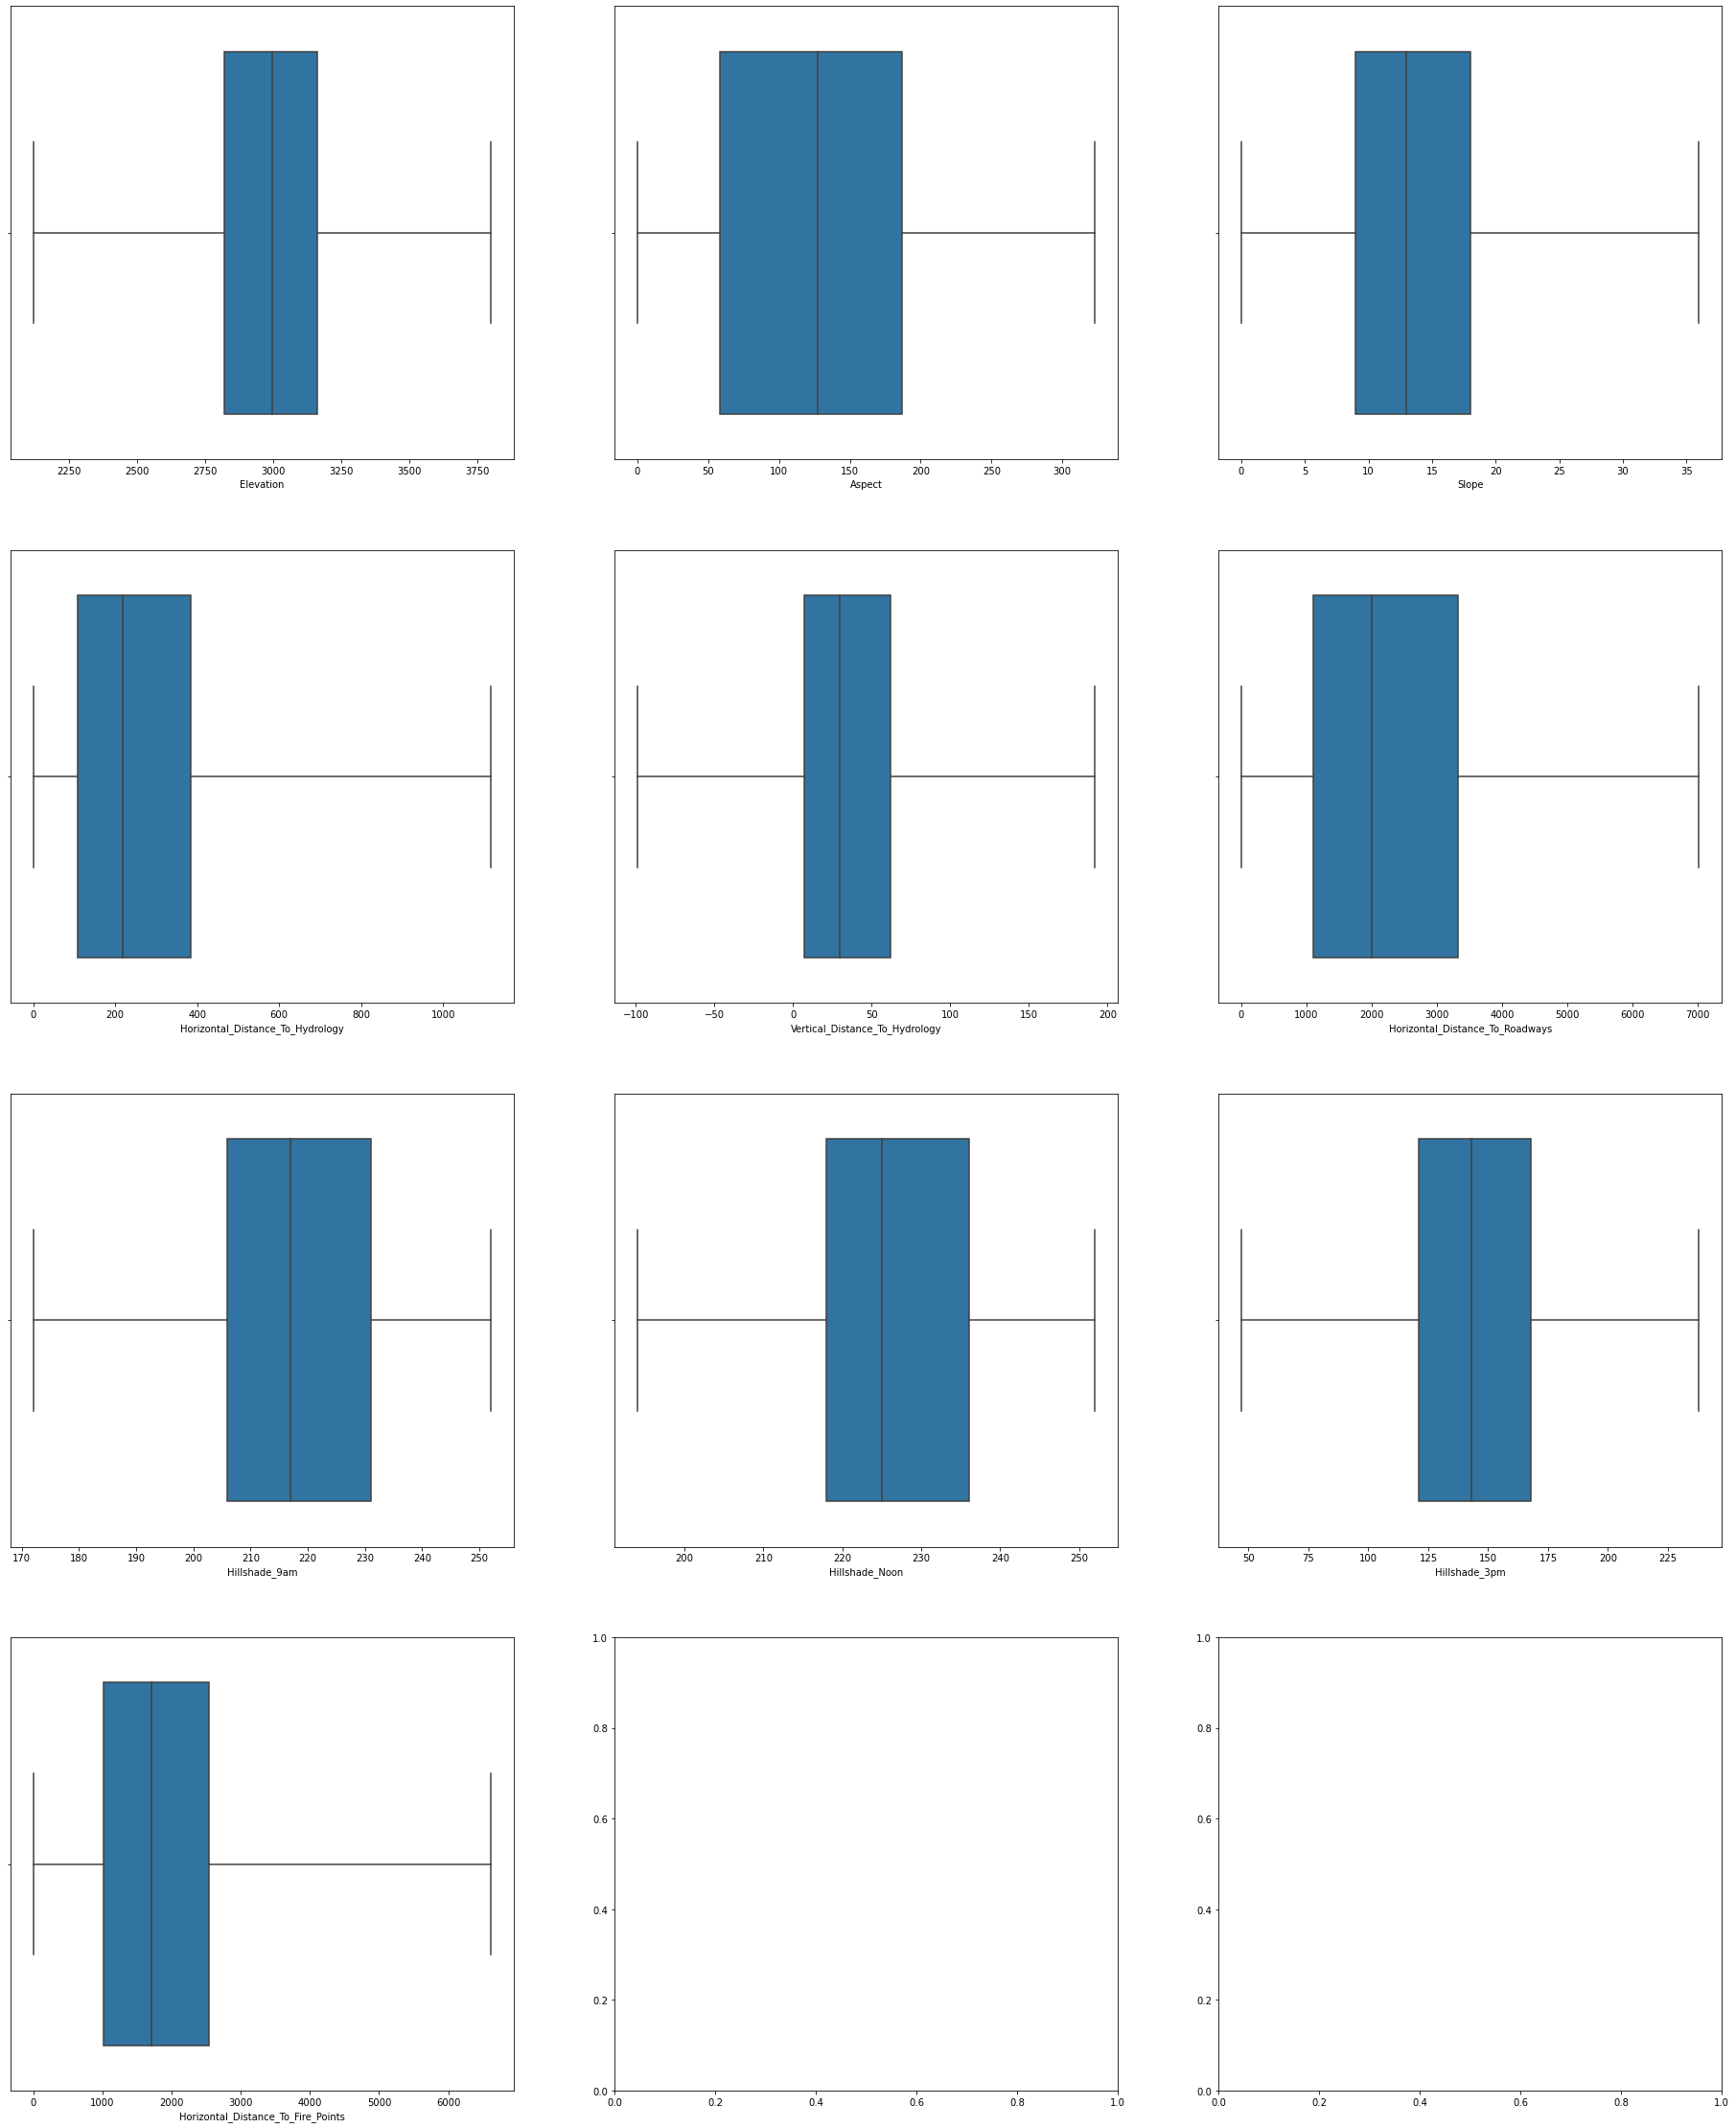

In [26]:
fig, axes = plt.subplots(nrows = 4,ncols = 3,figsize = (32,40))
i=0
y=0
for column in df.columns[:10]:
    sns.boxplot(column, data = df,ax=axes[i,y],whis=3)
    if y != 2:
        y += 1
    else:
        i += 1
        y = 0

In [27]:
df.shape

(581012, 55)

In [28]:
df_cleaned = df

#### *ii. Drop Outliers*

You can define another function to detect outliers in accordance with the ``zscore`` (how many times IQR) value you choose according to the result from the previous functions.

***
***

## 3. Feature Engineering with *sqlite3* Library

Feature engineering is an optional process to increase the predictive success of the model. The effort you put in should be worth increasing success. So you can develop your own feature engineering approach.

Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

You are requested to do feature engineering operations with SQL. There are two ways to do this:
1. After moving the final version of your data set to ***SQLite Browser*** and performing feature engineering operations there, you can convert the resulting data set to dataframe format and use it again in python.
2. In Python, you can create a database and table with your data set by using the functions of the sqlite3 library, after performing feature engineering with SQL, you can convert the resulting data set to a dataframe.

In this case, we will illustrate the second method.

Follow the steps below to do feature engineering with the [sqlite3](https://docs.python.org/3/library/sqlite3.html) library:
 1. Import *sqlite3* library
 2. Create a sqlite database (``"tree_database"``) and transferring dataframe(``tree1``) from python into database table (``covtype2``)
  - You can use *connect(), to_sql() and read_sql_query()* functions.
 3. Assign SQL codes for feature engineering to an object. (produce or transform new columns, get rid of unnecassary columns, make the dataset ready to model)
 4. Transform final version of SQL table to dataframe.
 
Finally, you can save the final version of your data as csv for use in your models and work on a different notebook. On the other hand, you can continue to work on this notebook with the last dataframe.

In [29]:
df_cleaned


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0,0,0,0,0,0,0,0,0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0,0,0,0,0,0,0,0,0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0,0,0,0,0,0,0,0,0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0,0,0,0,0,0,0,0,0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0,0,0,0,0,0,0,0,0,3
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0,0,0,0,0,0,0,0,0,3
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0,0,0,0,0,0,0,0,0,3
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0,0,0,0,0,0,0,0,0,3


<AxesSubplot:>

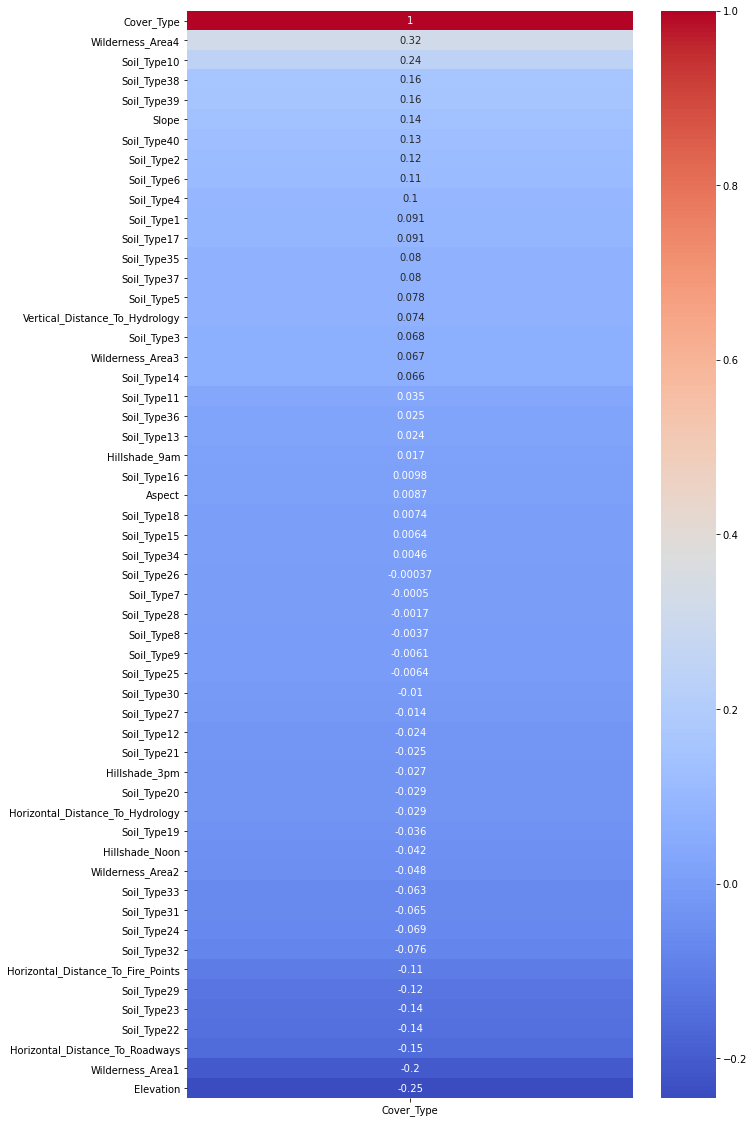

In [30]:
plt.figure(figsize=(10,20))
heatmap = df_cleaned.corr()
sns.heatmap(heatmap[["Cover_Type"]].sort_values(by=['Cover_Type'],ascending=False), annot=True,cmap="coolwarm")

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)
 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - KNN (Use ``KNeighborsClassifier`` model from ``sklearn.neighbors`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [31]:
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [32]:
X = df_cleaned.drop("Cover_Type", axis=1)

y = df_cleaned["Cover_Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y, random_state=42)

### Implement KNeighborsClassifer

The first and most important step for the [KNN](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/) algorithm is to determine the optimal k (number of neighbors). 

Build different models with k values in the range you specify. You can observe the change of train and test accuracy values according to different k values using a plot. The point at which train accuracy and test accuracy values begin to run parallel is the optimal k value. Then set up your final KNN model with the optimal k value you determined and calculate accuracy.

- Import the modul
- Fit the model 
- Predict the test set
- Visualize the result
- Evaluate the performance

In [33]:
"""sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)"""

'sc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)'

In [34]:
knn_model=KNeighborsClassifier().fit(X_train, y_train)

[[51058  1736     8     0    29     1   128]
 [ 1593 68880   119     0   146    69    18]
 [   24   133  8547    41     7   186     0]
 [   10     9   111   498     0    59     0]
 [   33   229    22     0  2082     7     0]
 [    9   132   220    25     8  3948     0]
 [  157    33     0     0     3     0  4935]]


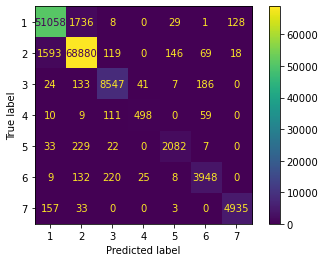

In [35]:
y_pred=knn_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(knn_model,X_test,y_test)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.96      0.96     52960
           2       0.97      0.97      0.97     70825
           3       0.95      0.96      0.95      8938
           4       0.88      0.72      0.80       687
           5       0.92      0.88      0.90      2373
           6       0.92      0.91      0.92      4342
           7       0.97      0.96      0.97      5128

    accuracy                           0.96    145253
   macro avg       0.94      0.91      0.92    145253
weighted avg       0.96      0.96      0.96    145253



### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [37]:
dt_mod = DecisionTreeClassifier()

In [38]:
X = df_cleaned.drop("Cover_Type", axis=1)

y = df_cleaned["Cover_Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y, random_state=42)

In [39]:
dt_mod.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
y_pred = dt_mod.predict(X_test)

[[49523  3123     6     0    37     7   264]
 [ 3176 66963   175     1   301   157    52]
 [    4   206  8266    90    20   352     0]
 [    0     8    81   567     0    31     0]
 [   53   359    23     0  1926    11     1]
 [   14   160   424    29     5  3710     0]
 [  264    39     1     0     1     0  4823]]
              precision    recall  f1-score   support

           1       0.93      0.94      0.93     52960
           2       0.95      0.95      0.95     70825
           3       0.92      0.92      0.92      8938
           4       0.83      0.83      0.83       687
           5       0.84      0.81      0.83      2373
           6       0.87      0.85      0.86      4342
           7       0.94      0.94      0.94      5128

    accuracy                           0.93    145253
   macro avg       0.90      0.89      0.89    145253
weighted avg       0.93      0.93      0.93    145253



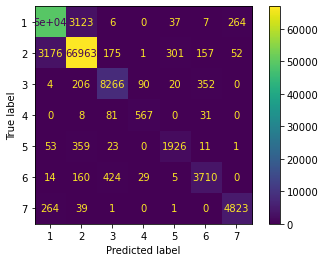

In [41]:
print(confusion_matrix(y_test,y_pred))

plot_confusion_matrix(dt_mod,X_test,y_test)

print(classification_report(y_test,y_pred))

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [42]:
rf_mod = RandomForestClassifier()

In [43]:
rf_mod.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
y_pred = rf_mod.predict(X_test)

[[49909  2927     1     0     9     2   112]
 [ 1671 68816   146     1    77    91    23]
 [    1   143  8566    32     8   188     0]
 [    0     1    81   574     0    31     0]
 [   33   495    22     0  1813    10     0]
 [    7   124   318    23     4  3866     0]
 [  257    32     0     0     0     0  4839]]
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     52960
           2       0.95      0.97      0.96     70825
           3       0.94      0.96      0.95      8938
           4       0.91      0.84      0.87       687
           5       0.95      0.76      0.85      2373
           6       0.92      0.89      0.91      4342
           7       0.97      0.94      0.96      5128

    accuracy                           0.95    145253
   macro avg       0.94      0.90      0.92    145253
weighted avg       0.95      0.95      0.95    145253



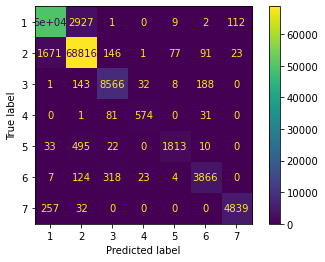

In [45]:
print(confusion_matrix(y_test,y_pred))

plot_confusion_matrix(rf_mod,X_test,y_test)

print(classification_report(y_test,y_pred))

## RT Tuned 

In [46]:
rf = RandomForestClassifier()

In [47]:
rf_params = {"n_estimators" :[100],
             "min_samples_split" :[4, 6, 8],
             "max_features" : [14, 16, 20],
             "max_depth":[20, 25, 30]}

In [48]:
# rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 5).fit(X_train, y_train)

In [49]:
# rf_cv_model.best_params_

In [50]:
# rf_cv_model2 = RandomizedSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 5, n_iter =10).fit(X_train, y_train)

# print(rf_cv_model2)

In [ ]:
# rf_cv_model2.best_params_

In [52]:
rf_tuned = RandomForestClassifier(n_estimators = 100,
                                  min_samples_split = 6,
                                  max_features = 20,
                                  max_depth = 30).fit(X_train, y_train)

In [53]:
y_pred = rf_tuned.predict(X_test)

[[50423  2416     2     0     7     2   110]
 [ 1368 69144   124     2    88    73    26]
 [    0   125  8605    39    10   159     0]
 [    0     0    69   594     0    24     0]
 [   26   441    21     0  1873    12     0]
 [    3   103   247    22     3  3964     0]
 [  209    32     0     0     1     0  4886]]
              precision    recall  f1-score   support

           1       0.97      0.95      0.96     52960
           2       0.96      0.98      0.97     70825
           3       0.95      0.96      0.96      8938
           4       0.90      0.86      0.88       687
           5       0.95      0.79      0.86      2373
           6       0.94      0.91      0.92      4342
           7       0.97      0.95      0.96      5128

    accuracy                           0.96    145253
   macro avg       0.95      0.92      0.93    145253
weighted avg       0.96      0.96      0.96    145253



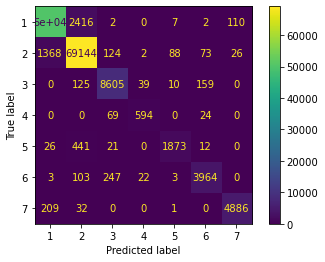

In [54]:
print(confusion_matrix(y_test,y_pred))

plot_confusion_matrix(rf_tuned,X_test,y_test)

print(classification_report(y_test,y_pred))

**from pandasgui import show


gui = show(df)**

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [56]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
y_pred = xgb_classifier.predict(X_test)

In [61]:
xgb_accuracy = accuracy_score(y_test, y_pred)

xgb_accuracy

0.9603175149566618

[[50423  2416     2     0     7     2   110]
 [ 1368 69144   124     2    88    73    26]
 [    0   125  8605    39    10   159     0]
 [    0     0    69   594     0    24     0]
 [   26   441    21     0  1873    12     0]
 [    3   103   247    22     3  3964     0]
 [  209    32     0     0     1     0  4886]]
              precision    recall  f1-score   support

           1       0.97      0.95      0.96     52960
           2       0.96      0.98      0.97     70825
           3       0.95      0.96      0.96      8938
           4       0.90      0.86      0.88       687
           5       0.95      0.79      0.86      2373
           6       0.94      0.91      0.92      4342
           7       0.97      0.95      0.96      5128

    accuracy                           0.96    145253
   macro avg       0.95      0.92      0.93    145253
weighted avg       0.96      0.96      0.96    145253



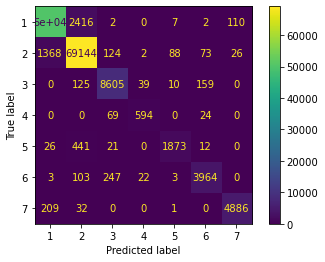

In [60]:
print(confusion_matrix(y_test,y_pred))

plot_confusion_matrix(rf_tuned,X_test,y_test)

print(classification_report(y_test,y_pred))

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

### Compare The Models

So far, you have created a multi-classifier model with 5 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

In [ ]:
compare = pd.DataFrame({"Model": ["K-Nearest Neighbor", "Random Forest", "XGBoost", "Decision Tree"],
                        "Accuracy": [knn_accuracy, rf_accuracy, xgb_accuracy, tree_accuracy]})
compare = compare.sort_values(by="Accuracy", ascending=True)
plt.figure(figsize=(10,10))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Accuracy Score of Different Models", size=14)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___